<a href="https://colab.research.google.com/github/hlbv17/CoffeePlants/blob/main/ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Antes de ejecutar el programa se debe cambiar el entorno de ejecución a GPU
# Entorno de ejecución > Cambiar tipo de entorno de ejecución

#Librerías a instalar

In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pillow matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Dataset utilizado

In [11]:
!kaggle datasets download -d coffeedisease/coffee-plant-disease

100% 970M/971M [00:11<00:00, 98.8MB/s]
100% 971M/971M [00:11<00:00, 91.6MB/s]


#Código para entrenamiento

In [12]:
import zipfile

with zipfile.ZipFile('coffee-plant-disease.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/datos')


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow_datasets as tfds

In [14]:
#Imprimir los metadatos para revisarlos
data_dir = '/content/datos/dataset'  # Ruta al directorio descomprimido

# Obtén la lista de archivos en el directorio
file_list = os.listdir(data_dir)
# Imprime el número total de archivos en el directorio
print("Número total de archivos:", len(file_list))

# Directorio de entrenamiento y validación
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'test')

# Definir los nombres de las clases
class_names = ['Rust', 'Healthy', 'Red Spider Mite']

# Parámetros de preprocesamiento y aumento de datos
batch_size = 32
img_height = 150
img_width = 150

Número total de archivos: 2


In [ ]:
# Preprocesamiento y aumento de datos en tiempo real
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 700 images belonging to 3 classes.


In [15]:
# Construir el modelo de red convolucional
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('/content/modelo.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 44s 1s/step - loss: 1.1314 - accuracy: 0.3814
Epoch 2/10
22/22 [==============================] - 30s 1s/step - loss: 1.0373 - accuracy: 0.4686
Epoch 3/10
22/22 [==============================] - 31s 1s/step - loss: 0.9502 - accuracy: 0.5157
Epoch 4/10
22/22 [==============================] - 30s 1s/step - loss: 0.9213 - accuracy: 0.5400
Epoch 5/10
22/22 [==============================] - 30s 1s/step - loss: 0.8855 - accuracy: 0.5943
Epoch 6/10
22/22 [==============================] - 33s 1s/step - loss: 0.8195 - accuracy: 0.6029
Epoch 7/10
22/22 [==============================] - 30s 1s/step - loss: 0.7538 - accuracy: 0.6529
Epoch 8/10
22/22 [==============================] - 30s 1s/step - loss: 0.7314 - accuracy: 0.6771
Epoch 9/10
22/22 [==============================] - 30s 1s/step - loss: 0.6561 - accuracy: 0.7114
Epoch 10/10
22/22 [==============================] - 31s 1s/step - loss: 0.5721 - accuracy: 0.7543


#Código para el probar el modelo de entrenamiento

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
base_dir = '/content/datos/dataset'
test_dir = os.path.join(base_dir, 'test')

# Parameters
batch_size = 32
img_height = 150
img_width = 150

# Preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the saved model
model = tf.keras.models.load_model('/content/modelo.h5')

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get the class labels
class_labels = test_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Predict class probabilities for each image in the test dataset
predictions = model.predict(test_generator)

# Get the true labels for the test dataset
true_labels = test_generator.classes

# Compare true labels with predicted labels
for i in range(len(predictions)):
    predicted_class = class_labels[predictions[i].argmax()]
    true_class = class_labels[true_labels[i]]
    print(f"Image {i+1}: Predicted: {predicted_class}, True: {true_class}")


Found 300 images belonging to 3 classes.
10/10 [==============================] - 29s 3s/step - loss: 2.0808 - accuracy: 0.3667
Test Loss: 2.0808165073394775
Test Accuracy: 0.36666667461395264
10/10 [==============================] - 28s 3s/step
Image 1: Predicted: red_spider_mite, True: Rust
Image 2: Predicted: healthy, True: Rust
Image 3: Predicted: Rust, True: Rust
Image 4: Predicted: healthy, True: Rust
Image 5: Predicted: Rust, True: Rust
Image 6: Predicted: Rust, True: Rust
Image 7: Predicted: red_spider_mite, True: Rust
Image 8: Predicted: red_spider_mite, True: Rust
Image 9: Predicted: healthy, True: Rust
Image 10: Predicted: healthy, True: Rust
Image 11: Predicted: healthy, True: Rust
Image 12: Predicted: healthy, True: Rust
Image 13: Predicted: healthy, True: Rust
Image 14: Predicted: healthy, True: Rust
Image 15: Predicted: healthy, True: Rust
Image 16: Predicted: red_spider_mite, True: Rust
Image 17: Predicted: red_spider_mite, True: Rust
Image 18: Predicted: Rust, True: Ru

#Gráficos

Un epoch es una unidad de medida que se utiliza en el entrenamiento de modelos de aprendizaje automático. Representa una iteración completa a través de todo el conjunto de datos de entrenamiento. Durante un epoch, el modelo procesa cada muestra de entrenamiento una vez y realiza ajustes en los pesos y sesgos para mejorar su rendimiento.

Epoch 1/10
22/22 [==============================] - 64s 3s/step - loss: 0.4910 - accuracy: 0.7971 - val_loss: 2.4549 - val_accuracy: 0.3700
Epoch 2/10
22/22 [==============================] - 58s 3s/step - loss: 0.4308 - accuracy: 0.8100 - val_loss: 2.9031 - val_accuracy: 0.3767
Epoch 3/10
22/22 [==============================] - 72s 3s/step - loss: 0.3518 - accuracy: 0.8371 - val_loss: 3.2884 - val_accuracy: 0.3833
Epoch 4/10
22/22 [==============================] - 61s 3s/step - loss: 0.2473 - accuracy: 0.9114 - val_loss: 3.7814 - val_accuracy: 0.4200
Epoch 5/10
22/22 [==============================] - 59s 3s/step - loss: 0.1319 - accuracy: 0.9586 - val_loss: 4.2160 - val_accuracy: 0.4133
Epoch 6/10
22/22 [==============================] - 59s 3s/step - loss: 0.0870 - accuracy: 0.9757 - val_loss: 4.4543 - val_accuracy: 0.4067
Epoch 7/10
22/22 [==============================] - 72s 3s/step - loss: 0.0594 - accuracy: 0.9829 - val_loss: 5.3320 - val_accuracy: 0.4000
Epoch 8/10
22/22 [==

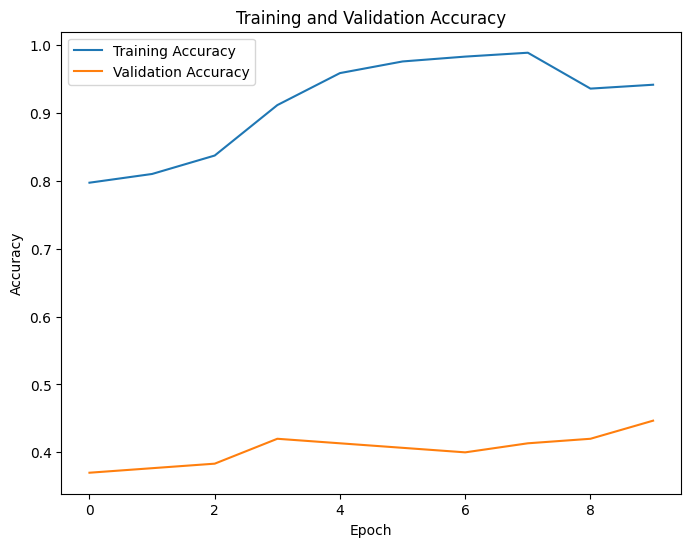

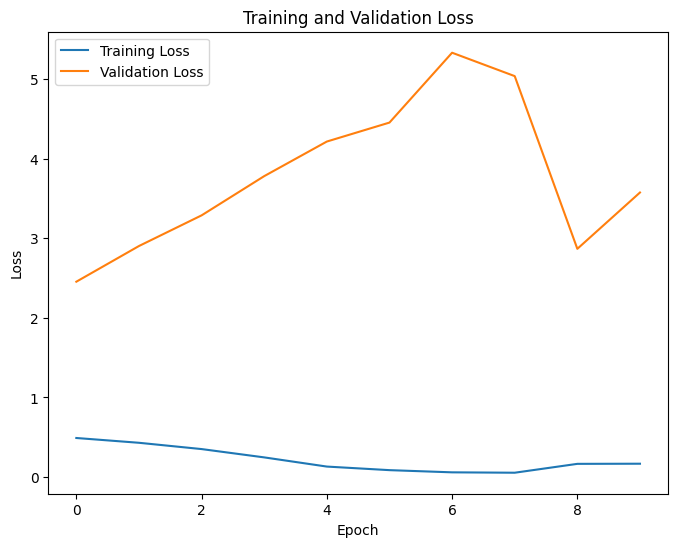

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history from the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Saving C1P1E1.jpg to C1P1E1.jpg
1/1 [==============================] - 0s 194ms/step


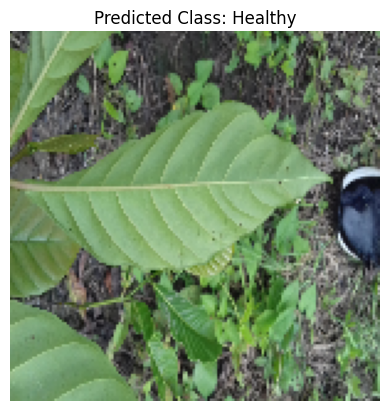

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Cargar el modelo previamente entrenado
model = tf.keras.models.load_model('/content/modelo.h5')

# Solicitar al usuario que seleccione una imagen
uploaded = files.upload()

# Obtener la ruta de la imagen cargada
image_path = next(iter(uploaded))

# Cargar la imagen y redimensionarla al tamaño requerido
img = image.load_img(image_path, target_size=(150, 150))

# Convertir la imagen a un arreglo numpy
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array /= 255.

# Realizar la clasificación
predictions = model.predict(img_array)

# Obtener el índice de la clase con mayor probabilidad
predicted_index = np.argmax(predictions[0])

# Obtener el nombre de la clase predicha
class_names = ['Rust', 'Healthy', 'Red Spider Mite']
predicted_class = class_names[predicted_index]

# Mostrar la imagen y la predicción
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()
